In [200]:
# - import datasets
import pandas as pd
import numpy as np

data1 = pd.read_csv("dataset1.csv")

In [201]:
# - Using sklearn augment the two features in the dataset with polynomial features
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
import numpy as np
import warnings
# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


# Takes in a dataframe and breaks it up into variables for the models
def data(df1):
  X1 = df1.iloc[:,0]
  X2 = df1.iloc[:,1]
  Y = df1.iloc[:,2]
  X = np.column_stack((X1,X2))
  return X,Y
 
def plot_features(df):
   #Didn't use data function here becuase didn't want X1 X2 in one variable
    X1 = df.iloc[:,0]
    X2 = df.iloc[:,1]
    Y = df.iloc[:,2]
    fig = plt.figure()
    # Creates a 3D scatter plot of the data
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X1, X2,Y )
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel('target', rotation=0)
    plt.show()

#  # Using the dummyc classifier model to generate mean accuracys and standard error for the data
def baselines(X,y,length):
    idiot = DummyClassifier(strategy='most_frequent')
    idiot_scores = cross_val_score(idiot, X, y, cv=5, scoring='accuracy')
    idiot_mean, idiot_std = idiot_scores.mean(), idiot_scores.std()
    idiot_mean = [idiot_mean] * length
    idiot_std = [idiot_std] * length
    return idiot_mean, idiot_std

def test_logistic(poly_range, c_range, df1):
    # Store data from dataframe
    X, y = data(df1)
    #generate baselines
    idiot_mean, idiot_std = baselines(X,y,len(c_range))
    
    # outerloop controlled by range of polynomial features
    for i in poly_range:
     mean_error = []
     std_error = []
     X_poly = PolynomialFeatures(i).fit_transform(X)
     # inner loop controlled by range of C values
     for j in c_range:
      model = LogisticRegression(C=j, penalty='l2')
      model.fit(X_poly, y)
      # mean accuracy calculated in the inner loop, and reset in the outer loop
      scores = cross_val_score(model, X_poly, y, cv=5, scoring='accuracy')
      mean_error.append(round(scores.mean(),3))
      std_error.append(round(scores.std(),3))
      
     # Plot the mean accuracies versus C for each polynomial degree
     plt.errorbar(c_range,idiot_mean,yerr=idiot_std,fmt='r')
     plt.errorbar(c_range, mean_error, yerr=std_error, fmt='b')
     plt.xlabel('C')
     plt.ylabel('Mean accuracy score')
     plt.xscale('log')
     plt.legend(['Baseline','Trained model'])
     plt.title(f'Polynomial Feature: {i}')
     plt.show()
     print(f'{i}:  {std_error}')

    return mean_error, std_error

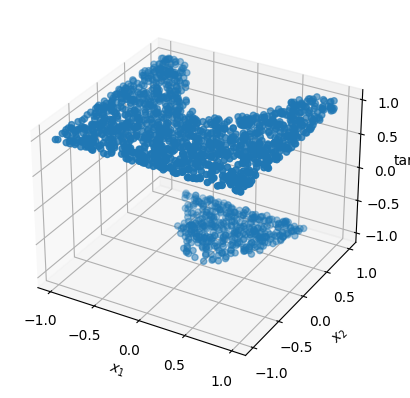

In [202]:
plot_features(data1)

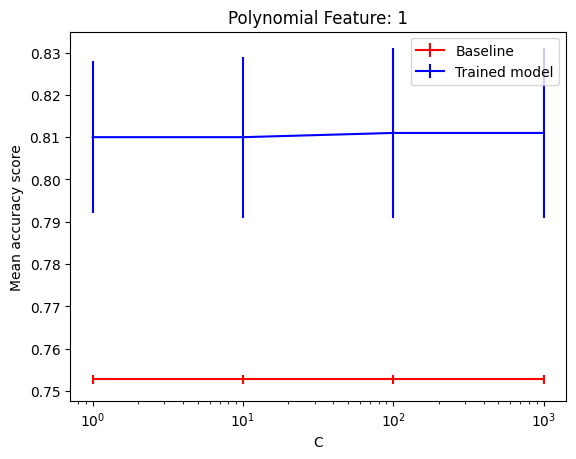

1:  [0.018, 0.019, 0.02, 0.02]


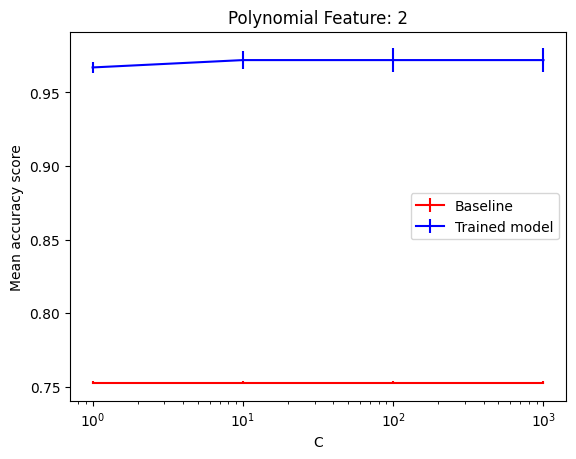

2:  [0.004, 0.006, 0.008, 0.008]


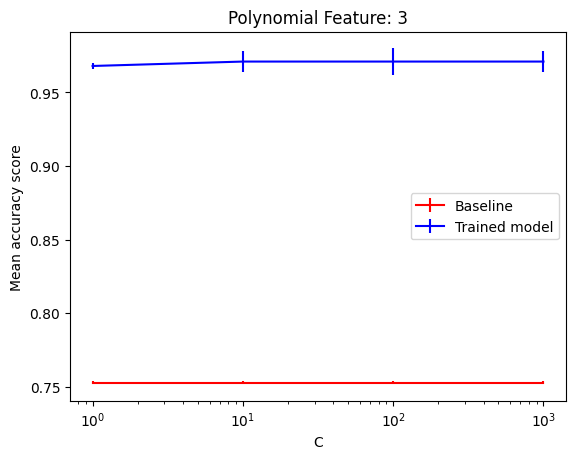

3:  [0.002, 0.007, 0.009, 0.007]


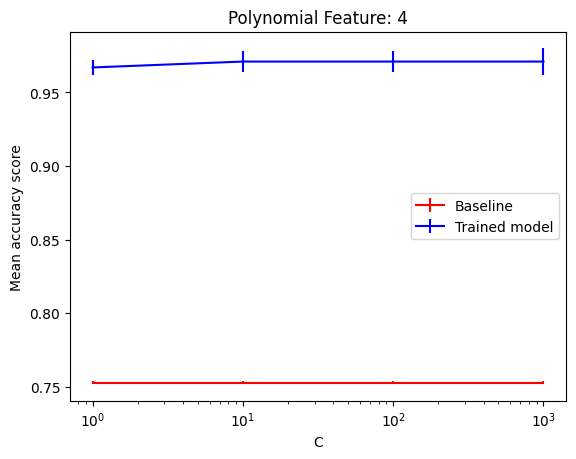

4:  [0.005, 0.007, 0.007, 0.009]


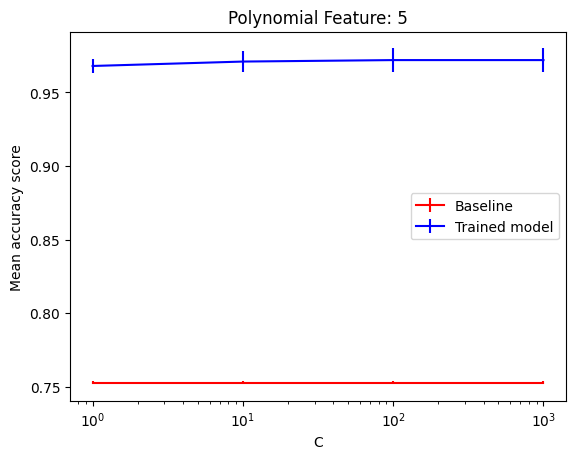

5:  [0.005, 0.007, 0.008, 0.008]


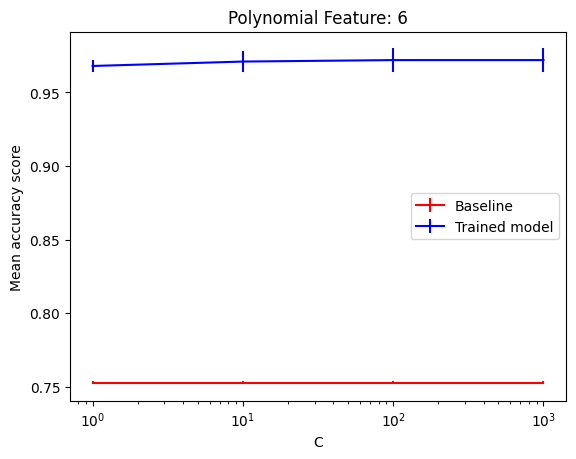

6:  [0.004, 0.007, 0.008, 0.008]


In [203]:

p_range = [1,2,3,4,5,6]
c_range = [1,10,100,1000]
mean = []
std = []
mean,std,  = test_logistic(p_range,c_range,data1)


In [204]:
# Tests k, same logic used as before just one loop
def test_knn(k_range,df):
    one = True
    X, y = data(df)
    idiot_mean, idiot_std = baselines(X,y,len(k_range))
    mean_error = []
    std_error = []
    for k in k_range:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X,y)
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        mean_error.append(round(scores.mean(),3))
        std_error.append(round(scores.std(),3))
    
    print(mean_error)
    print(std_error)
    print
    plt.errorbar(k_range,idiot_mean,yerr=idiot_std,fmt='r')
    plt.errorbar(k_range, mean_error, yerr=std_error, fmt='b')
    plt.xlabel('K')
    plt.ylabel('Mean accuracy score')

    plt.legend(['Baseline','Trained model'])
    plt.show()
    

[0.972, 0.97, 0.968, 0.969, 0.969, 0.969, 0.97, 0.969, 0.969, 0.967]
[0.007, 0.001, 0.004, 0.004, 0.002, 0.003, 0.004, 0.002, 0.005, 0.005]


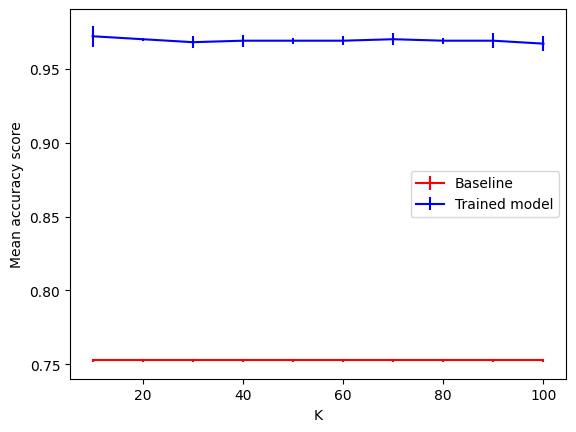

[0.967, 0.972, 0.969, 0.97, 0.972, 0.968]
[0.007, 0.007, 0.004, 0.001, 0.005, 0.004]


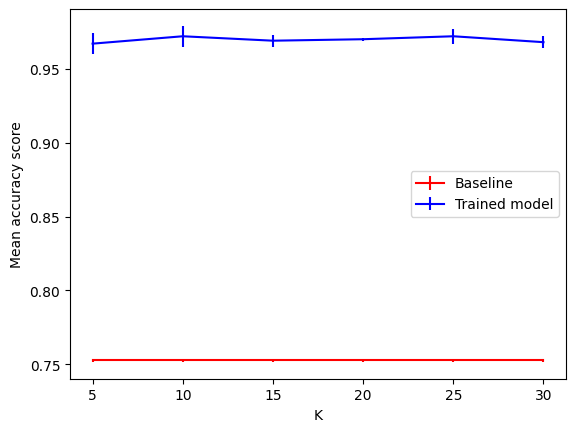

[0.96, 0.966, 0.964, 0.967, 0.963, 0.964, 0.967, 0.971, 0.972]
[0.012, 0.006, 0.01, 0.007, 0.01, 0.005, 0.006, 0.006, 0.007]


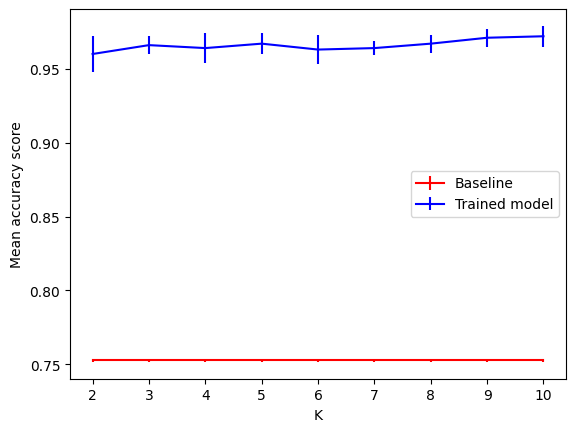

In [205]:
k_range = [10,20,30,40,50,60,70,80,90,100]
test_knn(k_range,data1)
k_range = [5,10,15,20,25,30]
test_knn(k_range,data1)
k_range = [2,3,4,5,6,7,8,9,10]
test_knn(k_range,data1)

In [206]:

# add the optimal values for each model then calculate the tpr and fpr and grah
def test_optimal_models2(df1):
    one = True
    X, y = data(df1)

    X_poly = PolynomialFeatures(3).fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y)
    
    opt_log = LogisticRegression(C=1, penalty='l2')
    opt_log.fit(X_train, y_train)
    y_pred_log = opt_log.predict(X_test)
    print("Confusion Matrix for Logistic Regression:")
    print(confusion_matrix(y_test, y_pred_log))

    fpr_log, tpr_log, _ = roc_curve(y_test, opt_log.decision_function(X_test))

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_log, tpr_log, color='blue', label='Logistic Regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='green', linestyle='dashed')
    plt.title('ROC Curve - Logistic Regression')
    plt.legend()
    plt.show()

    opt_knn = KNeighborsClassifier(n_neighbors=10)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    opt_knn.fit(X_train, y_train)
    y_pred_knn = opt_knn.predict(X_test)
    print("Confusion Matrix for k-Nearest Neighbors:")
    print(confusion_matrix(y_test, y_pred_knn))

    fpr_knn, tpr_knn, _ = roc_curve(y_test, opt_knn.predict_proba(X_test)[:, 1])

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_knn, tpr_knn, color='red', label='k-Nearest Neighbors')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='green', linestyle='dashed')
    plt.title('ROC Curve - k-Nearest Neighbors')
    plt.legend()
    plt.show()

# Same as other function but prints each model on one graph 
def test_optimal_models3(df1):
    one = True
    X, y = data(df1)

    X_poly = PolynomialFeatures(7).fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y)
    
    opt_log = LogisticRegression(C=0.1, penalty='l2')
    opt_log.fit(X_train, y_train)
    y_pred_log = opt_log.predict(X_test)
    print("Confusion Matrix for Logistic Regression:")
    print(confusion_matrix(y_test, y_pred_log))

    fpr_log, tpr_log, _ = roc_curve(y_test, opt_log.decision_function(X_test))

    opt_knn = KNeighborsClassifier(n_neighbors=50)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    opt_knn.fit(X_train, y_train)
    y_pred_knn = opt_knn.predict(X_test)
    print("Confusion Matrix for k-Nearest Neighbors:")
    print(confusion_matrix(y_test, y_pred_knn))

    idiot = DummyClassifier(strategy='most_frequent')
    idiot.fit(X_train,y_train)
    i_pred = idiot.predict(X_test)
    print("Confusion Matrix for Dummy model: ")
    print(confusion_matrix(y_test, i_pred))

    fpr_knn, tpr_knn, _ = roc_curve(y_test, opt_knn.predict_proba(X_test)[:, 1])

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_log, tpr_log, color='blue', label='Logistic Regression')
    plt.plot(fpr_knn, tpr_knn, color='red', label='k-Nearest Neighbors')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='green', linestyle='dashed')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()


Confusion Matrix for Logistic Regression:
[[ 88  16]
 [  3 327]]


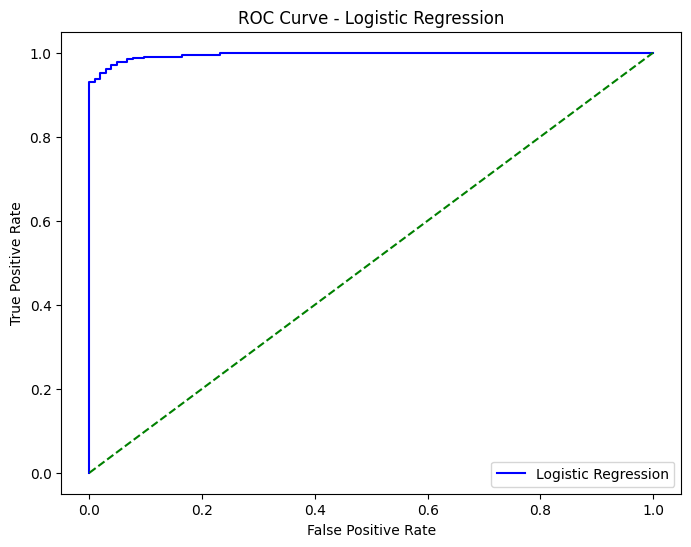

Confusion Matrix for k-Nearest Neighbors:
[[103   7]
 [  9 315]]


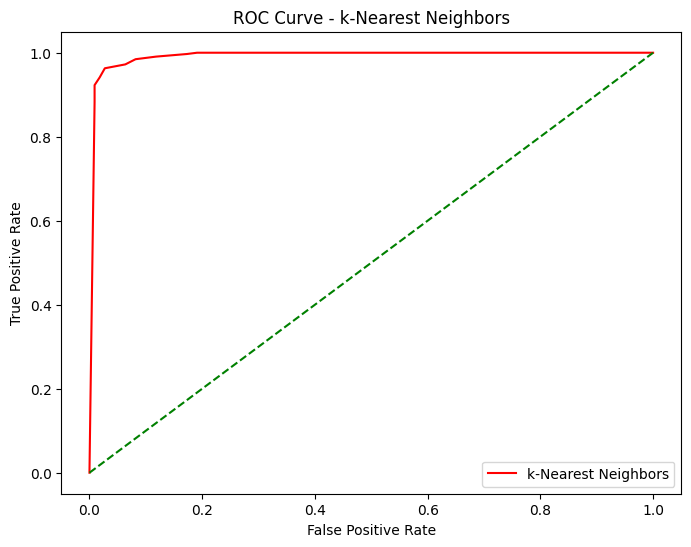

Confusion Matrix for Logistic Regression:
[[ 83  31]
 [  7 313]]
Confusion Matrix for k-Nearest Neighbors:
[[105  12]
 [  4 313]]
Confusion Matrix for Dummy model: 
[[  0 117]
 [  0 317]]


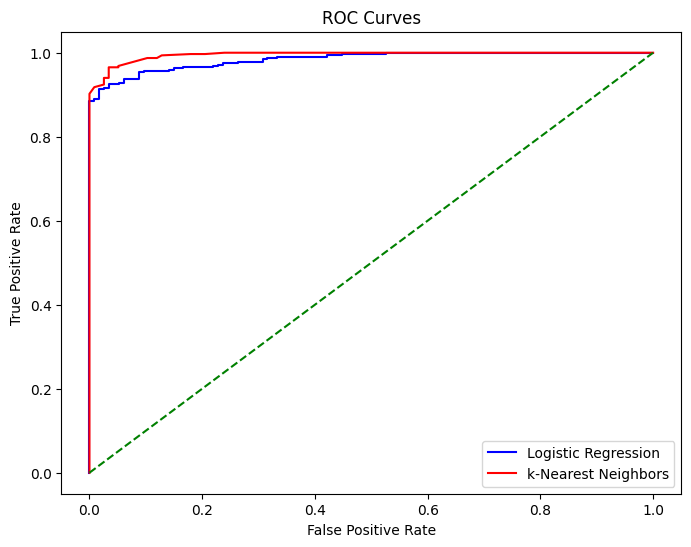

In [207]:
test_optimal_models2(data1)
test_optimal_models3(data1)

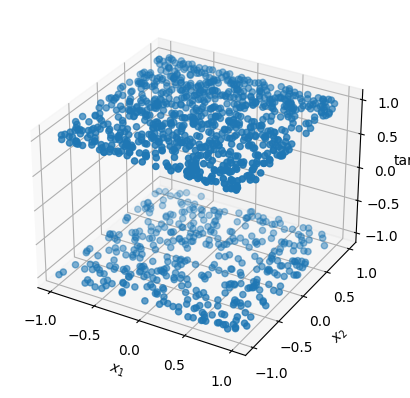

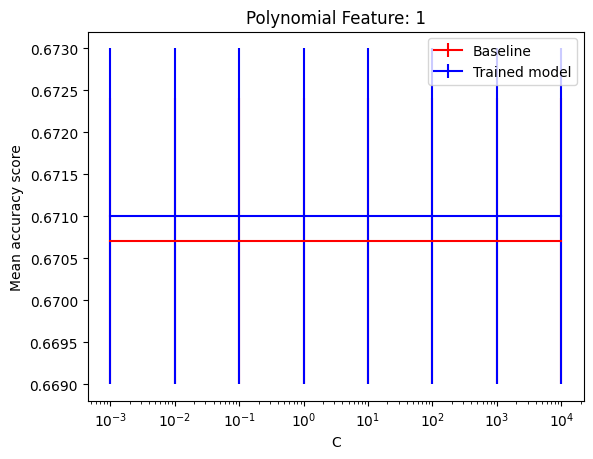

1:  [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002]


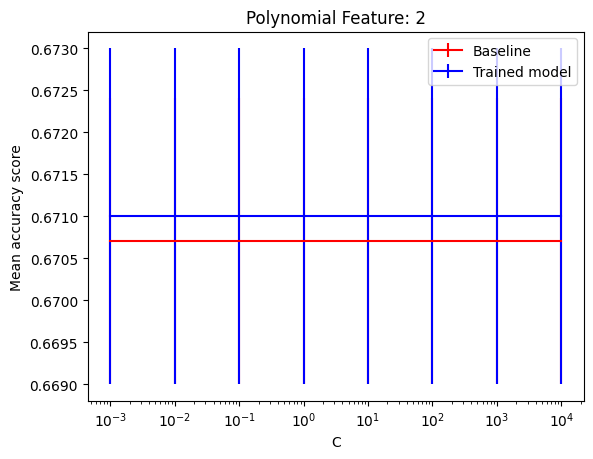

2:  [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002]


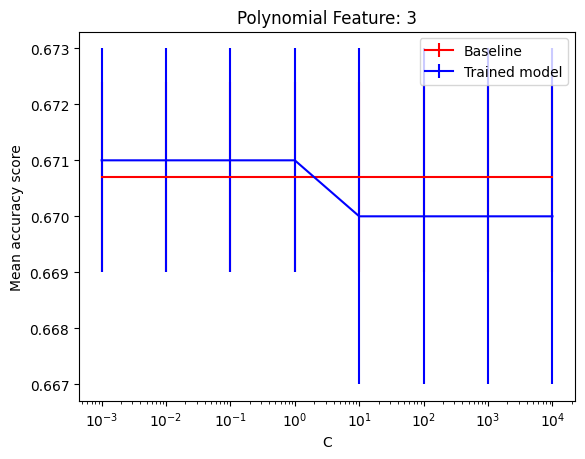

3:  [0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.003]


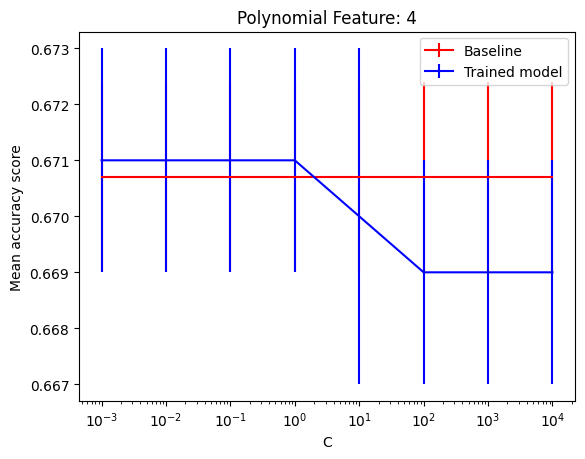

4:  [0.002, 0.002, 0.002, 0.002, 0.003, 0.002, 0.002, 0.002]


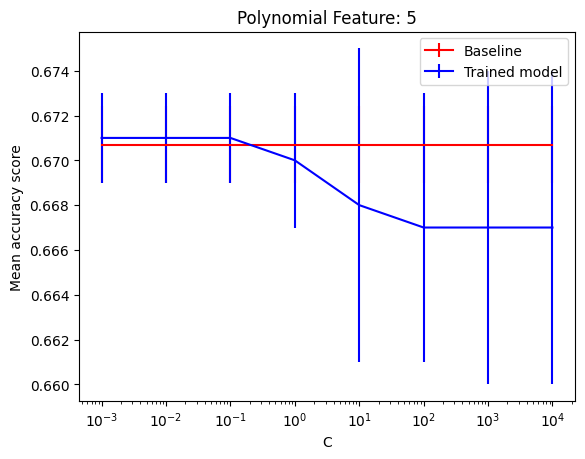

5:  [0.002, 0.002, 0.002, 0.003, 0.007, 0.006, 0.007, 0.007]


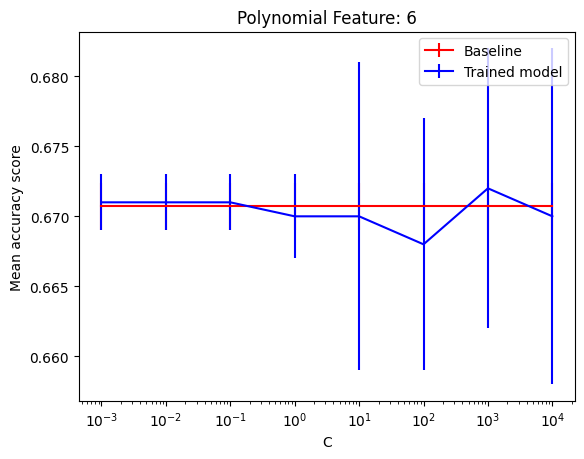

6:  [0.002, 0.002, 0.002, 0.003, 0.011, 0.009, 0.01, 0.012]


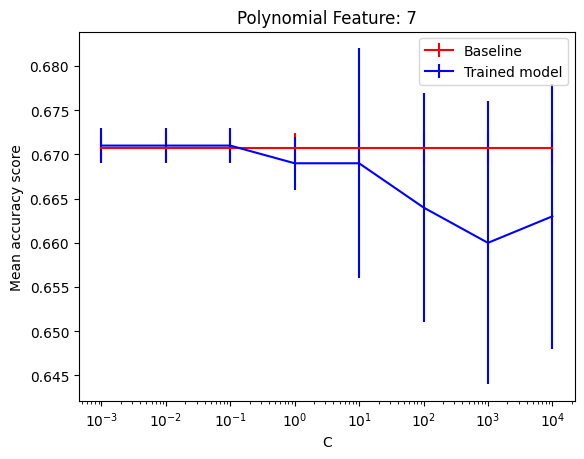

7:  [0.002, 0.002, 0.002, 0.003, 0.013, 0.013, 0.016, 0.015]


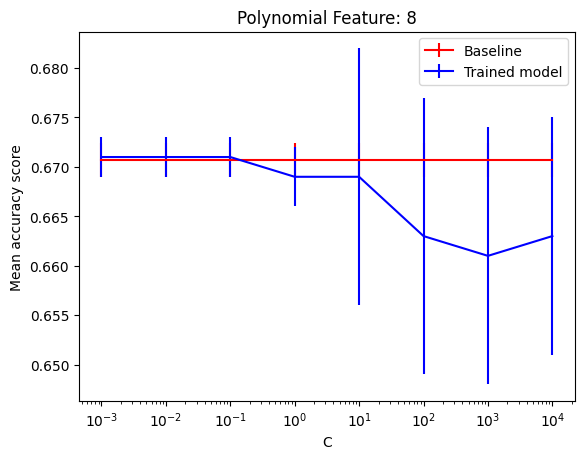

8:  [0.002, 0.002, 0.002, 0.003, 0.013, 0.014, 0.013, 0.012]


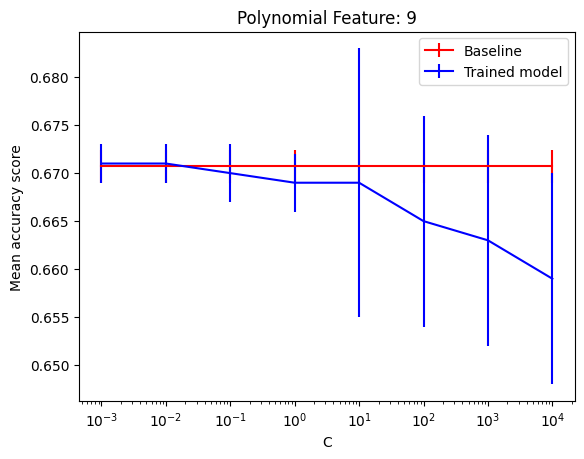

9:  [0.002, 0.002, 0.003, 0.003, 0.014, 0.011, 0.011, 0.011]


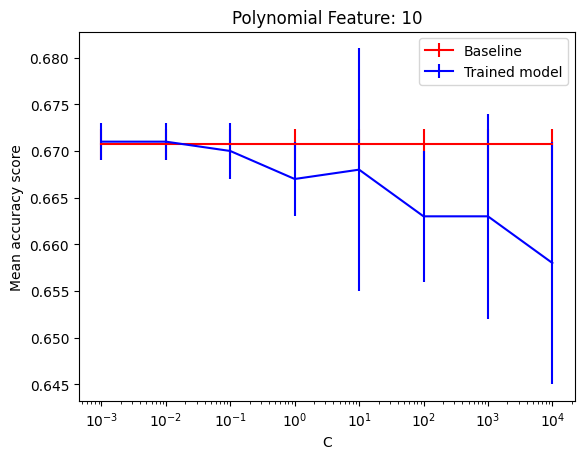

10:  [0.002, 0.002, 0.003, 0.004, 0.013, 0.007, 0.011, 0.013]


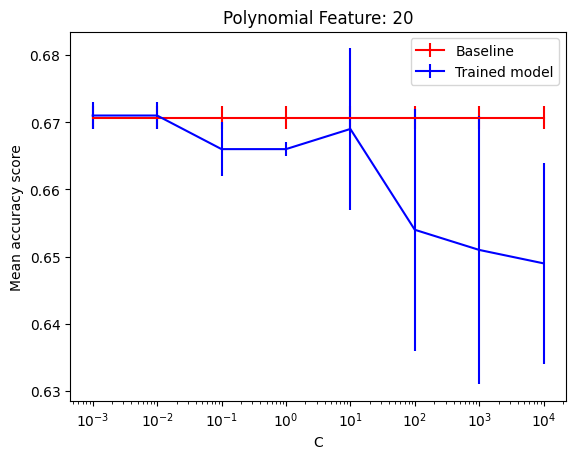

20:  [0.002, 0.002, 0.004, 0.001, 0.012, 0.018, 0.02, 0.015]


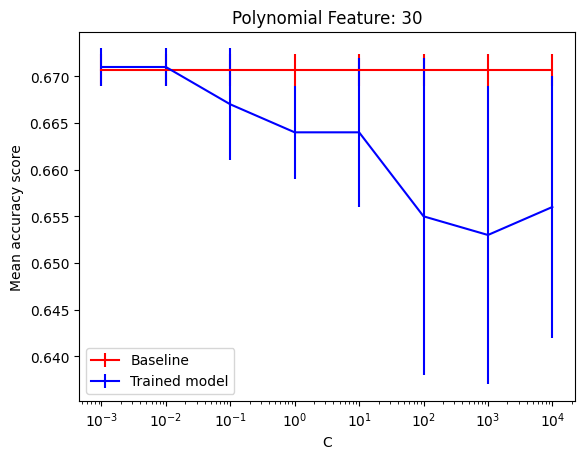

30:  [0.002, 0.002, 0.006, 0.005, 0.008, 0.017, 0.016, 0.014]


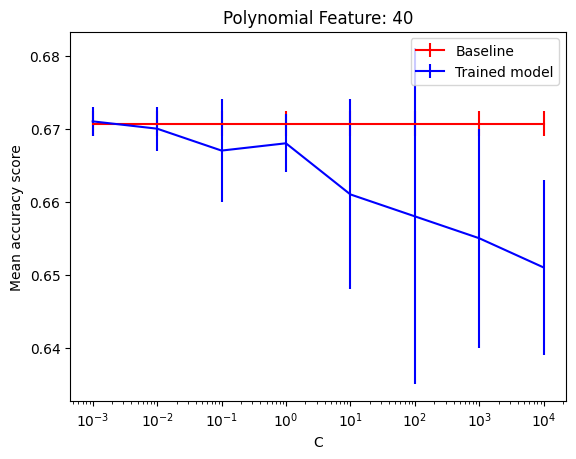

40:  [0.002, 0.003, 0.007, 0.004, 0.013, 0.023, 0.015, 0.012]


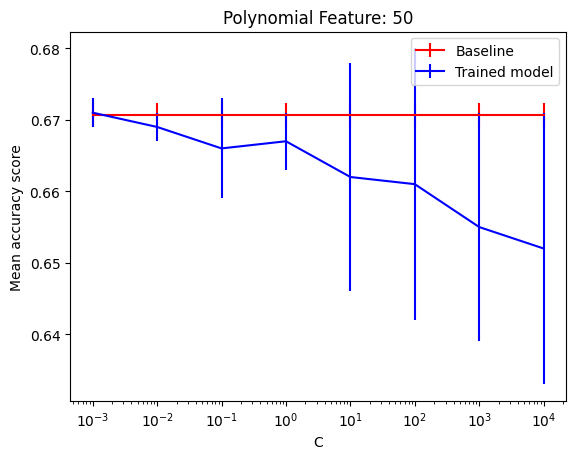

50:  [0.002, 0.002, 0.007, 0.004, 0.016, 0.019, 0.016, 0.019]
[0.618, 0.651, 0.672, 0.674, 0.676, 0.673, 0.668, 0.671, 0.671, 0.671]
[0.028, 0.018, 0.013, 0.01, 0.009, 0.01, 0.008, 0.002, 0.002, 0.002]


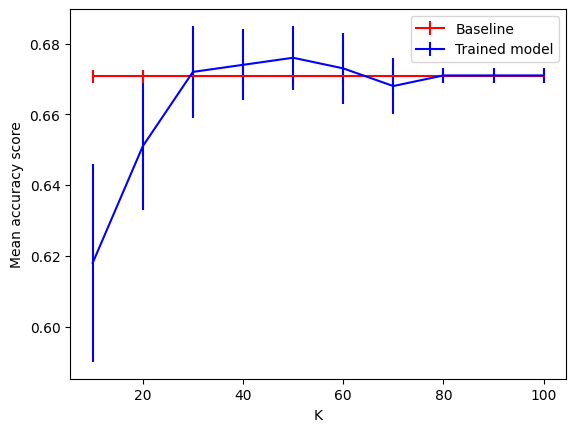

[0.622, 0.618, 0.645, 0.651, 0.669, 0.672]
[0.04, 0.028, 0.019, 0.018, 0.013, 0.013]


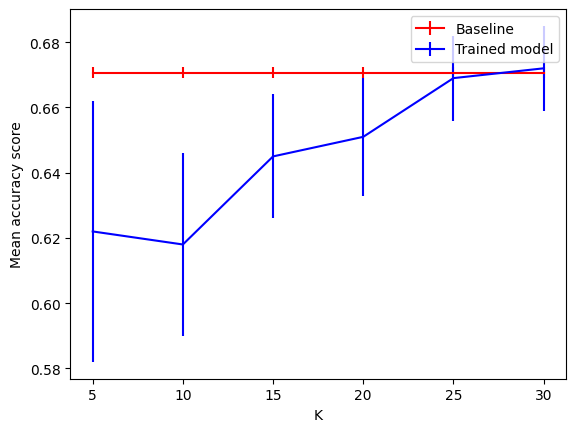

[0.524, 0.605, 0.566, 0.622, 0.6, 0.627, 0.613, 0.646, 0.618]
[0.018, 0.019, 0.018, 0.04, 0.043, 0.029, 0.04, 0.029, 0.028]


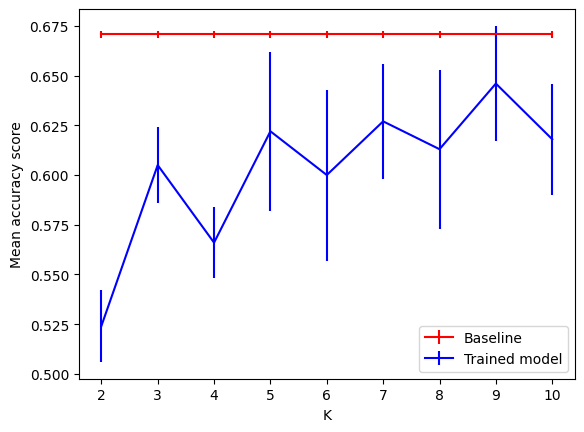

Confusion Matrix for Logistic Regression:
[[  0 108]
 [  0 202]]


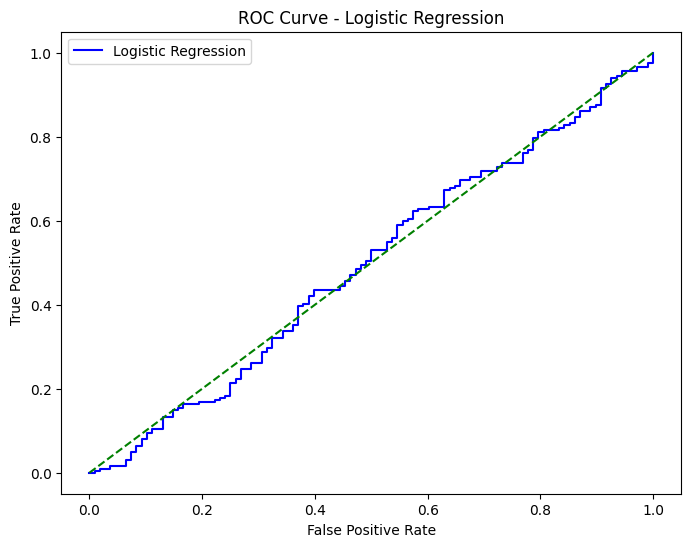

Confusion Matrix for k-Nearest Neighbors:
[[ 22  74]
 [ 60 154]]


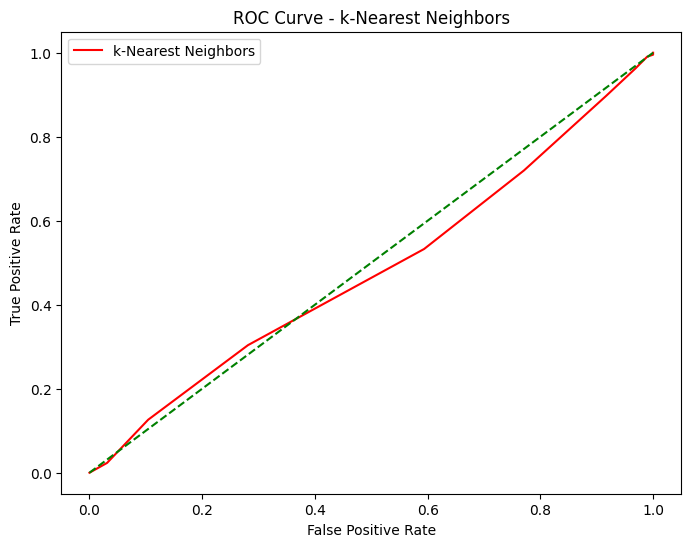

Confusion Matrix for Logistic Regression:
[[  0 103]
 [  0 207]]
Confusion Matrix for k-Nearest Neighbors:
[[  1  88]
 [  4 217]]
Confusion Matrix for Dummy model: 
[[  0  89]
 [  0 221]]


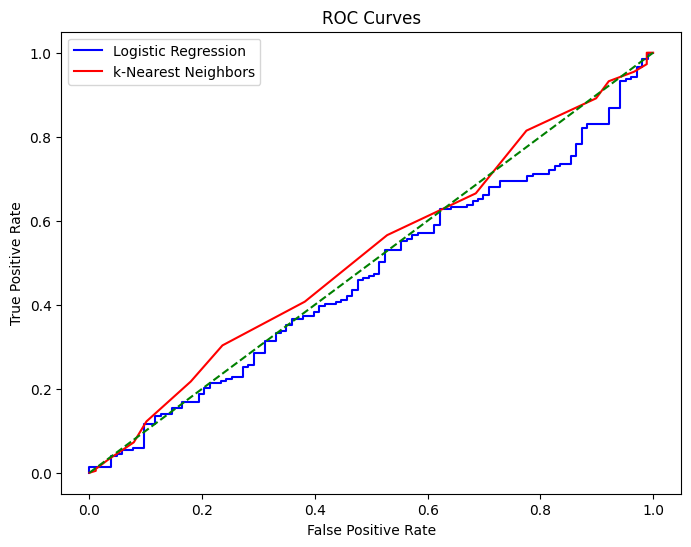

In [208]:
# Call all the other functions for the other dataset
data2 = pd.read_csv("dataset2.csv")
plot_features(data2)
p_range = [1,2,3,4,5,6,7,8,9,10,20,30,40,50]
c_range = [0.001,0.01,0.1,1,10,100,1000,10000]
mean = []
std = []
mean,std,  = test_logistic(p_range,c_range,data2)
k_range = [10,20,30,40,50,60,70,80,90,100]
test_knn(k_range,data2)
k_range = [5,10,15,20,25,30]
test_knn(k_range,data2)
k_range = [2,3,4,5,6,7,8,9,10]
test_knn(k_range,data2)
test_optimal_models2(data2)
test_optimal_models3(data2)